In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as ticker
from PIL import Image
import seaborn as sns; 
sns.set_style("whitegrid")

#%matplotlib inline


Bad key "lines.markeredgecolor" on line 81 in
/home/pedrolarben/.config/matplotlib/stylelib/gadfly.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [14]:
_METRICS_FILE = './files/benchmark_pool'
_METRIC = 'kappa'
_CLASSIFIER = 'keras_parallel_3_Dilated_Conv'

datasets_to_remove = ['bankmarketingnorm', 'airlinesnorm']
datasets_to_remove += ['breast', 'carnorm', 'covtype', 'electricity', 'higgs200k', 'kddcup99norm', 'ozone', 'pendigitis', 'pokerhand', 'spambase', 'susy100k']
classifiers_to_remove = ['keras_3_Dilated_Conv', 'keras_parallel_3_Dilated_Conv']

In [3]:
# read data
metrics = pd.read_csv(_METRICS_FILE+'.csv')

# Delete datasets and classifier that we dont want
metrics = metrics[~metrics.classifier.isin(classifiers_to_remove)]
metrics = metrics[metrics.classifier.isin(['MOA_ASHoeffdingTree', 'MOA_HoeffdingOptionTree', 'MOA_HoeffdingTree', 'MOA_LeveragingBag', 'MOA_OzaBagAdwin', 'MOA_OzaBoostAdwin', 'MOA_SingleClassifierDrift', 'keras_parallel_3_Dilated_Conv_pooling', 'sklearn_MLPClassifier', 'sklearn_SGDClassifier'])]
metrics = metrics[~metrics.dataset.isin(datasets_to_remove)]

metrics = metrics[metrics['instances']>1000]

print(len(metrics.dataset.unique()), "datasets")
metrics.sample(10)

29 datasets


,dataset,classifier,instances,attributes,classes,accuracy,kappa,train_time_mean,test_time_mean,total_time_mean,train_time,test_time,total_time
2646,pendigits,MOA_OzaBoostAdwin,10992,16,10,0.924980,0.909211,0.001560,0.000803,0.002363,1.715879,0.883470,2.599348
765,FordA,MOA_OzaBoostAdwin,4921,500,2,0.536843,0.045305,0.017452,0.002874,0.020326,8.603843,1.416907,10.020750
2137,UWaveGestureLibraryX,MOA_LeveragingBag,4478,315,8,0.642026,0.568878,0.051132,0.018123,0.069255,22.907233,8.119154,31.026387
1524,Phoneme,keras_parallel_3_Dilated_Conv_pooling,2100,1024,39,0.268881,0.208389,0.040230,0.015737,0.055966,8.448225,3.304696,8.448225
2355,Yoga,MOA_OzaBoostAdwin,3300,426,2,0.491067,0.075367,0.009684,0.002149,0.011833,3.195777,0.709080,3.904857
1027,ItalyPowerDemand,MOA_LeveragingBag,1096,24,2,0.967207,0.931874,0.001458,0.000027,0.001485,0.160386,0.002933,0.163319
665,FacesUCR,MOA_HoeffdingOptionTree,2250,131,14,0.807631,0.777421,0.001219,0.000953,0.002172,0.274259,0.214442,0.488702
1213,MedicalImages,MOA_OzaBagAdwin,1141,99,10,0.516670,0.020496,0.004228,0.000024,0.004252,0.486229,0.002807,0.489036
2130,UWaveGestureLibraryX,MOA_ASHoeffdingTree,4478,315,8,0.641978,0.568892,0.001687,0.001359,0.003046,0.755612,0.608964,1.364576
1944,Symbols,keras_parallel_3_Dilated_Conv_pooling,1010,398,6,0.962505,0.951277,0.029099,0.019885,0.048984,2.939049,2.008351,2.939049


In [4]:
metrics_table = metrics.pivot(index='dataset',columns='classifier')[_METRIC]
metrics_table = metrics_table.dropna()
metrics_table = metrics_table.reindex(metrics_table.mean().sort_values(ascending=False).index, axis=1)
metrics_table = metrics_table.sort_values(by=list(metrics_table.columns), ascending=False)
metrics_table = metrics_table[metrics_table.columns[0:]]
limits = (min(metrics_table.min().min()-0.05, -0.1), max(metrics_table.max().max()+0.05, 1.1))
print(limits)

metrics_table

(-0.1, 223.70553514099998)


classifier,MOA_LeveragingBag,MOA_OzaBoostAdwin,MOA_OzaBagAdwin,keras_parallel_3_Dilated_Conv_pooling,MOA_HoeffdingOptionTree,MOA_ASHoeffdingTree,MOA_HoeffdingTree,MOA_SingleClassifierDrift,sklearn_MLPClassifier,sklearn_SGDClassifier
dataset,,,,,,,,,,
NonInvasiveFetalECGThorax2,223.655535,181.938139,164.814137,15.558415,9.754356,9.391368,9.428658,8.738229,1.828300,2.615103
NonInvasiveFetalECGThorax1,213.157570,175.071474,158.174452,14.133259,9.919605,9.546104,9.454915,7.603822,1.988265,2.883351
Phoneme,109.945569,43.771080,46.598697,8.448225,6.609039,6.535609,6.616403,6.401172,1.036087,1.458460
ShapesAll,73.263012,45.869165,47.330091,3.416993,2.866324,3.087899,2.795753,2.562559,0.401264,0.844144
Mallat,34.099393,22.614750,22.331373,9.337214,1.468641,1.402613,1.416828,1.146913,1.309732,0.440995
UWaveGestureLibraryX,22.907233,11.599478,12.822258,14.147663,0.759737,0.755612,0.734191,0.603576,1.791754,0.719625
UWaveGestureLibraryY,22.595286,11.983467,12.313755,14.534893,0.763788,0.759455,0.742108,0.654404,1.352267,0.624507
UWaveGestureLibraryZ,22.023607,11.574487,12.060122,14.686371,0.752566,0.772771,0.742923,0.607467,2.282244,0.782835
HandOutlines,19.296849,13.824561,9.606927,7.893959,0.745428,0.774140,0.672972,0.523232,1.782880,0.166341


In [5]:
metrics_table = metrics_table.reindex(metrics_table.mean().sort_values(ascending=False).index, axis=1)
list(metrics_table.columns)
metrics_table.mean()

classifier
MOA_LeveragingBag                        30.908879
MOA_OzaBoostAdwin                        21.180668
MOA_OzaBagAdwin                          19.710014
keras_parallel_3_Dilated_Conv_pooling    10.934495
MOA_HoeffdingOptionTree                   1.400087
MOA_ASHoeffdingTree                       1.349575
MOA_HoeffdingTree                         1.330486
MOA_SingleClassifierDrift                 1.178527
sklearn_MLPClassifier                     0.918228
sklearn_SGDClassifier                     0.526239
dtype: float64

In [6]:
classifiers = list(metrics_table.columns)
classifier_labels = [n.replace('_',' - ') if 'keras' not in n else 'keras - CNN' for n in classifiers]
classifier_labels = "keras CNN, MLP, Single classifier drift, AS Hoeffding tree, Hoeffding tree, Hoeffding option tree, Leveraging bag, Oza Boost Adwin, Oza Bag Adwin, SGD".split(", ") 

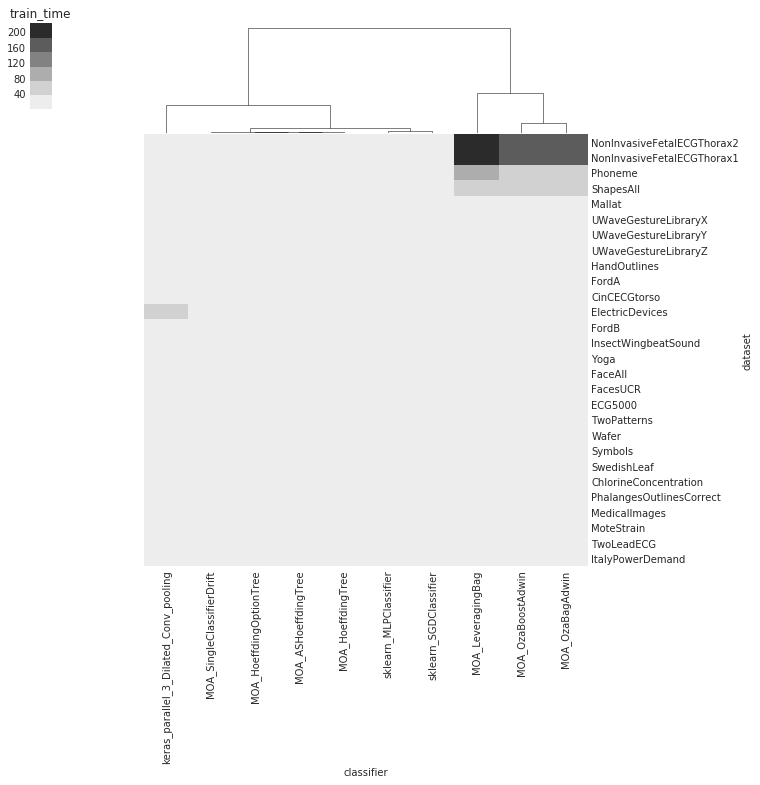

In [7]:
#sns.color_palette("BuGn")
#sns.cm.rocket_r
#sns.palplot(sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True))
with plt.style.context('seaborn-whitegrid'):
    cm = sns.clustermap(metrics_table, figsize=(10,10), cmap=sns.color_palette("Greys"), annot=False, linewidth=0.0, row_cluster=False)
    cm.cax.yaxis.tick_left()
    cm.cax.yaxis.set_label_position("left")
    #cm.cax.set_visible(False)
    cm.cax.set_title(_METRIC)

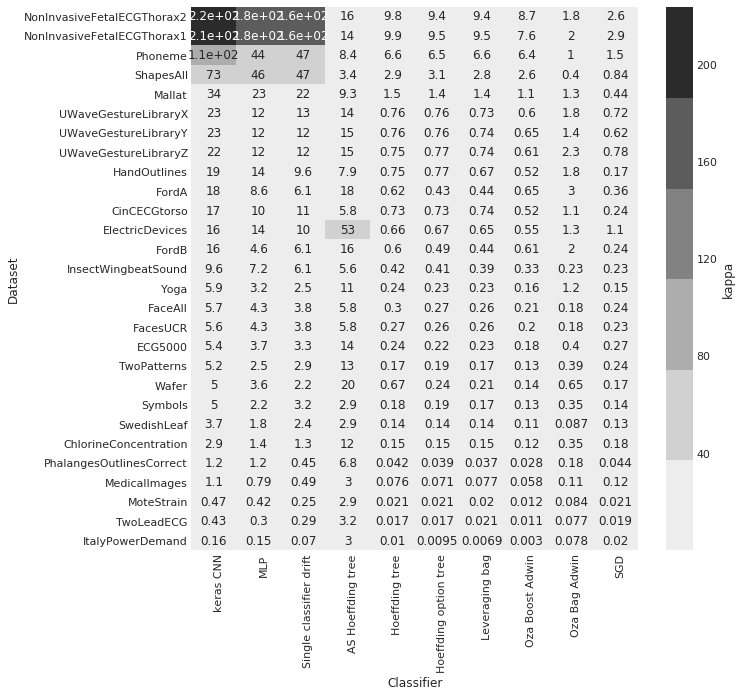

In [8]:
sns.set(font_scale=1.0)
with plt.style.context('seaborn-whitegrid'):
    fig,ax = plt.subplots(figsize=(10,10))
    sns.heatmap(metrics_table, cmap=sns.color_palette("Greys"), annot=True, linewidth=0.0, ax=ax, cbar_kws={'label': 'kappa'})
    ax.set_xticklabels(classifier_labels, rotation=90, ha="right", rotation_mode="anchor")
    ax.set_xlabel("Classifier")
    ax.set_ylabel("Dataset")
#plt.savefig("files/plots/heatmap.png")
    

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)]

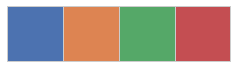

In [9]:
with plt.style.context('seaborn-whitegrid'):
    sns.palplot(sns.color_palette(n_colors=4))
sns.color_palette(n_colors=4)

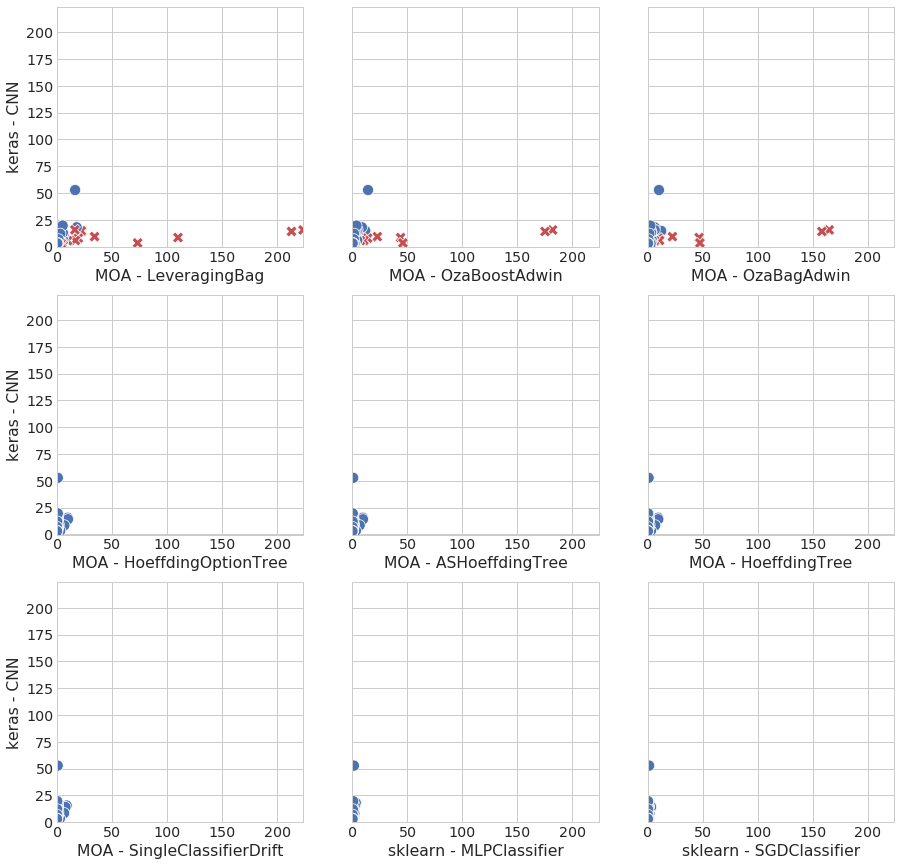

In [10]:
sns.set(font_scale=1.3)

clf_name = 'keras_parallel_3_Dilated_Conv_pooling'
classifiers = metrics_table.columns[~metrics_table.columns.isin(['keras_parallel_3_Dilated_Conv', 'keras_parallel_3_Dilated_Conv_pooling'])]
metrics_table['size'] = metrics.pivot(index='dataset', columns = 'classifier', values='instances')[clf_name]

#pal = {True:(0.12156862745098039, 0.4666666666666667, 0.7058823529411765) , False:(0.8392156862745098, 0.15294117647058825, 0.1568627450980392)}
#pal = {True:(0.17254901960784313, 0.6274509803921569, 0.17254901960784313) , False:(0.8392156862745098, 0.15294117647058825, 0.1568627450980392)} 

with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(3,3, figsize=(15,15))

    for i in range(3):
        for j in range(3):

            clf = classifiers[i*3+j]
            metrics_table['diff'] = ((metrics_table[clf_name]-metrics_table[clf])>0)


            #sns.lineplot(x=[-1,2], y=[-1,2], ax=ax[i][j], dashes=True, color='white')
            #ax[i][j].lines[0].set_linestyle("--")
            sns.scatterplot(y=metrics_table[clf_name], x=metrics_table[clf], palette=pal, ax=ax[i][j],hue=metrics_table['diff'], legend=False, style = ~metrics_table['diff'], s=125 )#, size=metrics_table['size'])

            count_ls = [metrics_table[metrics_table['diff']]['diff'].count(),metrics_table[~metrics_table['diff']]['diff'].count()]
            
            #patches, autotexts = ax[i][j].pie(count_ls,labeldistance=0.5, colors = ((*pal[True],0.9),(*pal[False],0.9)), frame=True, center=(0.9,0.0), radius=0.1)
            #autotexts[0].set_color('white')
            #autotexts[1].set_color('white')
            

            ax[i][j].set_ylabel('keras - CNN')
            ax[i][j].set_xlabel(clf.replace('_',' - '))
            ax[i][j].set_xlim(limits)
            ax[i][j].set_ylim(limits)
            if i != 2:
                pass
                #ax[i][j].set_xticklabels([])
            if j != 0:
                ax[i][j].set_ylabel('')
                ax[i][j].set_yticklabels([])

#plt.savefig('files/plots/scatter.png', dpi=fig.dpi)
del metrics_table['size'], metrics_table['diff']         
sns.set(font_scale=1)

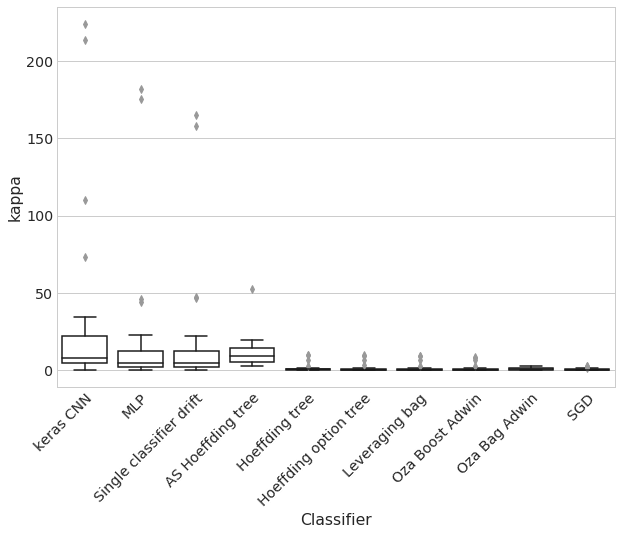

In [11]:
sns.set(font_scale=1.3)
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(10,7))
    sns.boxplot(data=metrics_table,  ax=ax, color='white')
    ax.set_ylabel('kappa')
    ax.set_xticklabels(classifier_labels, rotation=45, ha="right", rotation_mode="anchor")
    ax.set_xlabel('Classifier')
    plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax.lines, color='k')

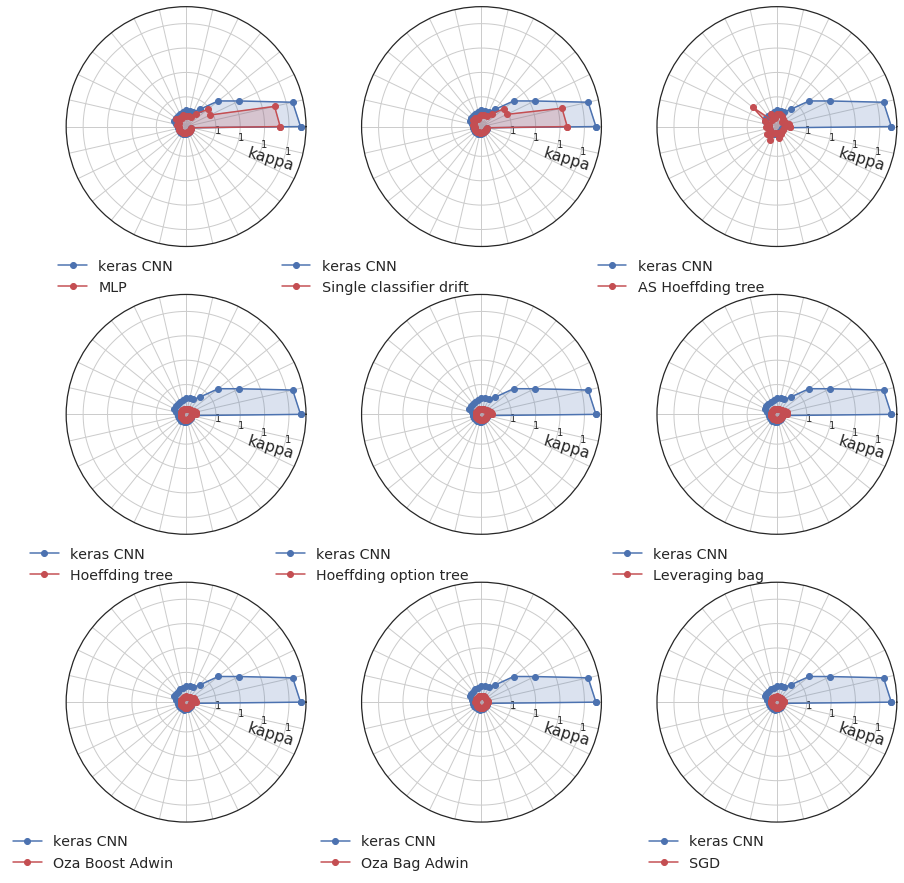

In [12]:
datasets = list(metrics_table.index)
angles=np.linspace(0, 2*np.pi, len(datasets), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))

styles = ['o-', 'o--', 'o--', 'o--', 'o--', 'o--', 'o--', 'o--', 'o--', 'o--']

cnn = metrics_table.columns[0]
stats_cnn = metrics_table[cnn].values
stats_cnn = np.concatenate((stats_cnn,[stats_cnn[0]]))


sns.set(font_scale=1.3)
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(ncols=3, nrows=3, subplot_kw=dict(polar=True), figsize=(15,15))
    # close the plot
    for i in range(3):
        for j in range(3):
            e = i*3+j+1
            clf = metrics_table.columns[e]
            stats=metrics_table[clf].values
            stats=np.concatenate((stats,[stats[0]]))
            ax[i][j].plot(angles, stats_cnn, 'o-', label=classifier_labels[0], color=pal[True])
            ax[i][j].fill(angles, stats_cnn, alpha=0.2,color=pal[True])
            ax[i][j].plot(angles, stats, 'o-', label=classifier_labels[e], color=pal[False])
            ax[i][j].fill(angles, stats, alpha=0.2, color=pal[False])
            

            ax[i][j].set_thetagrids(angles * 180/np.pi, ['' if i%2==1 else '' for i in range(len(datasets))])
    
            ax[i][j].set_yticklabels(['' if t<=0.3 else ("{0:.1f}".format(t) if t<1 else '1' ) for i,t in enumerate(list(ax[i][j].get_yticks()))], 
                                     fontsize=10)
            ax[i][j].set_rlabel_position(-17)
            label_position=ax[i][j].get_rlabel_position()
            ax[i][j].text(np.radians(label_position),ax[i][j].get_rmax()/2.,'kappa',
                    rotation=label_position,ha='left',va='top')
    
            handles, labels = ax[i][j].get_legend_handles_labels()

            ax[i][j].legend(loc='upper right', bbox_to_anchor=(0.5, 0.))    
    #ax.set_title("kappa")
    #ax.grid(True)



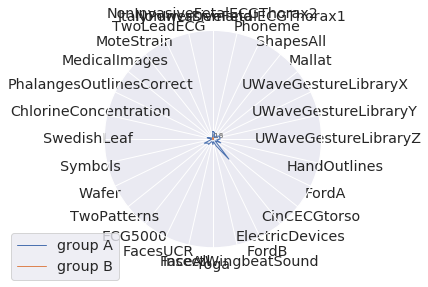

In [13]:
from math import pi
# Set data
 
 
 
# ------- PART 1: Create background
 
# number of variable
categories=list(metrics_table.index)
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([-0.1,0.2,0.4,0.6,0.8,1], ["","","","0.6","0.8","1"], color="grey", size=7)
plt.ylim(limits)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=metrics_table['keras_parallel_3_Dilated_Conv_pooling'].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=metrics_table['sklearn_SGDClassifier'].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))